# Inferencia Estadística
## Como modelar y extraer inferencias

In [1]:
%matplotlib inline
import matplotlib.pyplot as mpl
import numpy as np
np.random.seed(123)

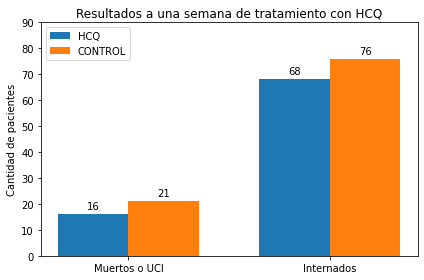

In [51]:
labels = ['Muertos o UCI', 'Internados']
dt_hcq = [16,68]
dt_control = [21,76]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = mpl.figure()
ax = fig.gca()

rects1 = ax.bar(x - width/2, dt_hcq, width, label='HCQ')
rects2 = ax.bar(x + width/2, dt_control, width, label='CONTROL')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim(0,90)
ax.set_ylabel('Cantidad de pacientes')
ax.set_title('Resultados a una semana de tratamiento con HCQ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
mpl.show()


Fuente: doi:10.1101/2020.04.10.20060699

En el estudio se observaron solo 2 posibles resultados, los pacientes estaban "Internados" (0) o bien "Muertos o UCI" (1). Al transcurso de la semana de tratamiento.

En su notación como variable aleatoria para los pacientes tratados con HCQ seria:

In [2]:
a = np.zeros(16)+1
b = np.zeros(84-16)
π1 = np.concatenate((a,b))
print(π1)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


De la misma manera para el grupo de CONTROL

In [3]:
a = np.zeros(21)+1
b = np.zeros(97-21)
π2 = np.concatenate((a,b))
print(π2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


El teorema del limite central, estipula que una toda* variable aleatoria proviene de
una distribución Normal o bien se puede transformar a una de este tipo.

Las variables que tenemos de momento son discretas y siguen una distribución de Bernoulli (tipo cara y sello de una moneda). 
Para obtener de ellas una distribución Normal debemos promediar muestras aleatorias 
de ellas. 

In [4]:
x1 = np.random.choice(π1,size=(10000000,30))

Una muestra aleatoria del grupo HCQ, en este caso de 30 pacientes

In [5]:
print(x1[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1.]


tiene promedio

In [52]:
np.mean(x1[0])

0.1

Una segunda muestra aleatoria del mismo grupo

In [6]:
print(x1[1])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1.]


tiene promedio

In [53]:
np.mean(x1[1])

0.2

El TLC involucra un limite, entre más veces se repita el proceso anterior,
mayor sera la similitud con una distribución Normal. 

Aqui se repite el proceso 10000000 veces y se presenta las nuevas v.a obtenidas en un histograma

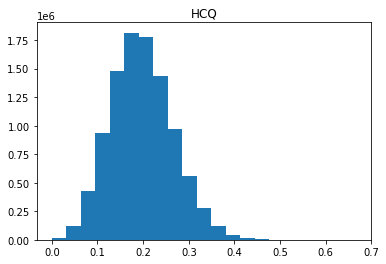

In [9]:
x1_m = np.mean(x1,axis=1)
mpl.hist(x1_m, bins=len(np.unique(x1_m)))
mpl.title("HCQ")
mpl.show()

igualmente para el grupo CONTROL

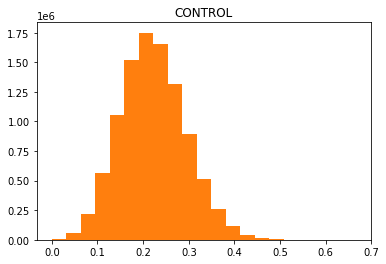

In [10]:
x2 = np.random.choice(π2,size=(10000000,30))
x2_m = np.mean(x2,axis=1)
mpl.hist(x2_m, bins=len(np.unique(x2_m)), color="C1")
mpl.title("CONTROL")
mpl.show()

Los nuevos datos (10000000 por cada grupo HCQ y CONTROL) se pueden agrupar en una tabla, 
para su modelado y estudio posterior.

In [57]:
import pandas as pd
dt = pd.DataFrame({"HCQ": x1_m, "CONTROL": x2_m})
dt.to_csv("experimento_hcq.csv",index=None)
dt.sample(10000).to_excel("experimento_hcq_10k.xlsx",index=None)
dt.sample(5)

,HCQ,CONTROL
1624985,0.166667,0.133333
9909505,0.200000,0.233333
3251482,0.200000,0.300000
3466544,0.200000,0.166667
4125684,0.033333,0.233333


Las medida de centralidad y dispersión para cada grupo (calculo por columna)

In [58]:
σ1 = np.std(x1_m)
ρ1 = np.mean(x1_m)
ρ2 = np.mean(x2_m)
σ2 = np.std(x2_m)
pd.DataFrame({"Media": [ρ1, ρ2], "Std": [σ1, σ2]}, index=["HCQ", "CONTROL"])

,Media,Std
HCQ,0.190474,0.071670
CONTROL,0.216506,0.075207


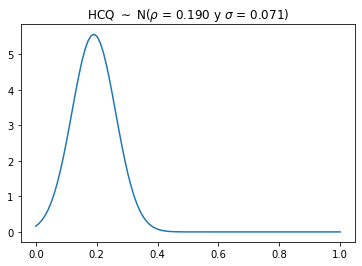

In [12]:
from scipy.stats import norm
x = np.linspace(0,1,100)
y1 = norm.pdf(x,loc=ρ1,scale=σ1)
mpl.plot(x,y1)
mpl.title(r"HCQ $\sim$ N($\rho$ = 0.190 y $\sigma$ = 0.071)")
mpl.show()

Comparando las distribuciones de ambos grupos HCQ y CONTROL,

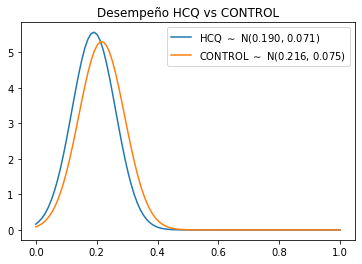

In [13]:
x = np.linspace(0,1,100)
y2 = norm.pdf(x,loc=ρ2,scale=σ2)
mpl.plot(x,y1,label=r"HCQ $\sim$ N(0.190, 0.071)")
mpl.plot(x,y2,label=r"CONTROL $\sim$ N(0.216, 0.075)")
mpl.title("Desempeño HCQ vs CONTROL")
mpl.legend()
mpl.show()

### Test de Hipótesis

In [14]:
import pandas as pd
q025_1, q975_1 = norm.ppf((0.025, 0.975), loc=ρ1, scale=σ1)
q025_2, q975_2 = norm.ppf((0.025, 0.975), loc=ρ2, scale=σ2)
pd.DataFrame({"Q(0.025)": [q025_1, q025_2], "Media": [ρ1, ρ2], "Q(0.975)": [q975_1, q975_2]}, index=["HCQ", "CONTROL"])

,Q(0.025),Media,Q(0.975)
HCQ,0.050003,0.190474,0.330945
CONTROL,0.069103,0.216506,0.363910


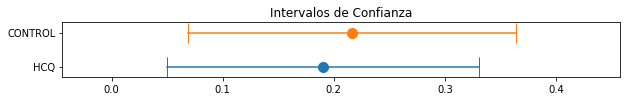

In [15]:
mpl.figure(figsize=(10,1))
mpl.margins(0.3)
mpl.plot((q025_1, q975_1),(0,0),marker="|",markersize=20,c="C0")
mpl.plot((ρ1),(0),marker='o', markersize=10,c="C0")
mpl.plot((q025_2, q975_2),(1,1),marker="|",markersize=20,c="C1")
mpl.plot((ρ2),(1),marker='o', markersize=10,c="C1")
mpl.yticks((0,1),("HCQ", "CONTROL"))
mpl.title("Intervalos de Confianza")
mpl.show()